## Penyeimbangan Data Ecoli


Penyeimbangan data Ecoli dilakukan untuk mengatasi masalah ketidakseimbangan kelas, di mana jumlah data pada kelas mayoritas jauh lebih banyak dibandingkan kelas minoritas. Jika dibiarkan, model machine learning cenderung bias dengan hanya mengenali kelas mayoritas, sementara kelas minoritas—yang justru sering memiliki informasi biologis penting—terabaikan. Dengan menyeimbangkan data, distribusi antar kelas menjadi lebih adil sehingga model mampu belajar secara seimbang



### Mendownload Dataset Ecoli dari UCI [https://archive.ics.uci.edu/](https://archive.ics.uci.edu/dataset/39/ecoli)

Kunjungi halaman UCI berikut untuk mendapatkan dataset Ecoli,setelah itu lanjutkan dengan menekan tombol download

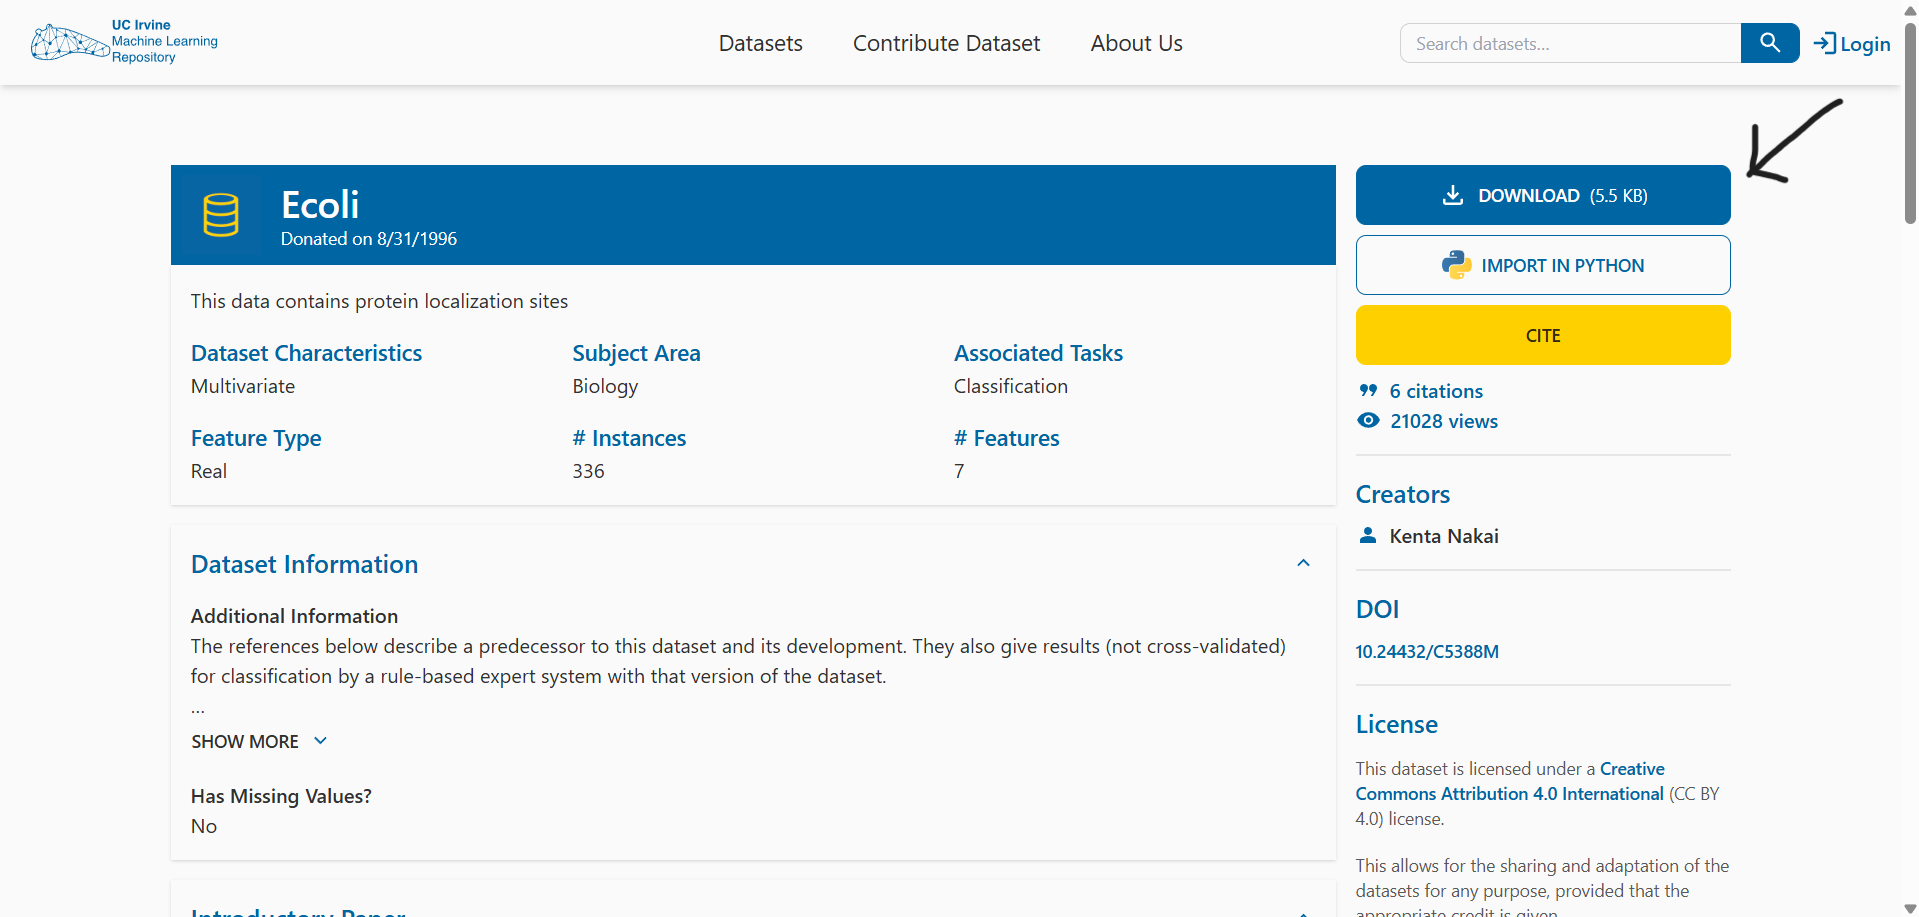

Namun sebelum dimasukkan kedalam Database Mysql Dataset Ecoli tersebut harus dikonversi terlebih dahulu karena format dari Dataset ini bukanlah csv

jadi saya membuat kode untuk mengubah format Dataset Ecoli ini agar menjadi csv.Berikut adalah kode nya:

In [ ]:
import pandas as pd

# Nama file input dan output
nama_file_data = 'ecoli.data'
nama_file_csv = 'ecoli.csv'

# NAMA KOLOM BARU SESUAI PERMINTAAN ANDA
nama_kolom = [
    'id_protein',
    'feature1',
    'feature2',
    'feature3',
    'feature4',
    'feature5',
    'feature6',
    'feature7',
    'class_label'
]

try:
    # Membaca file .data
    # sep='\s+' akan menangani pemisah berupa satu atau lebih spasi
    df = pd.read_csv(nama_file_data, sep='\s+', header=None, names=nama_kolom)

    # Menyimpan ke file CSV tanpa kolom indeks
    df.to_csv(nama_file_csv, index=False)

    print(f" Berhasil! File '{nama_file_data}' telah diubah menjadi '{nama_file_csv}' dengan kolom baru.")

except FileNotFoundError:
    print(f" Gagal! Pastikan file '{nama_file_data}' berada di folder yang sama dengan script ini.")
except Exception as e:
    print(f"Terjadi error: {e}")

### Membuat Database Mysql
Proses pembuatan database Mysql menggunakan database cloud [aiven.io](https://aiven.io/) dan dbeaver sebagai tempat untuk menyimpan suatu datanya. kemudian mengkoneksikan aiven ke dbeaver melalui kredensial yang dimiliki project aiven. Selanjutnya, membuat database pada service dan mengimport data dalam bentuk csv..  



### Membuat Service Mysql  pada [aiven.io ](https://aiven.io/)



*   Kunjungi laman situs aiven.io melalui link https://aiven.io/



*   Silahkan login terlebih dahulu jika
belum memiliki akun aiven
*   Buat Project terlebih dahulu sebelum membuat servicenya.


*   Buat Project terlebih dahulu sebelum membuat servicenya.
*   Klik “Create Service” dan pilih databse Postgre sebagai databasenya.


*  Buat Service untuk MySQL








  









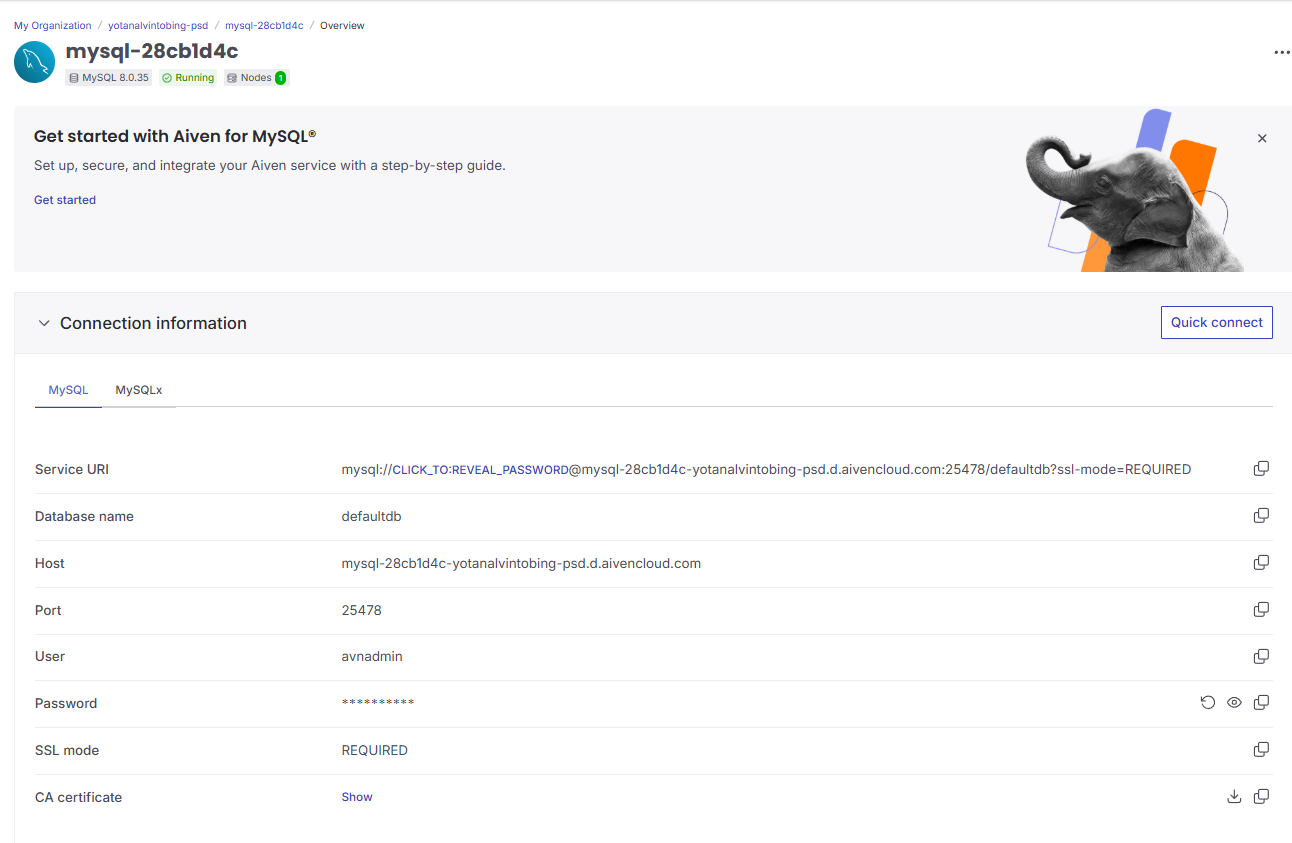

### Koneksikan [aiven.io](https://aiven.io/) ke Dbeaver

Data Ecoli tersebut akan disimpan pada Dbeaver dan akan dikoneksikan kepada [aiven.io](https://aiven.io/)

berikut adalah cara membuat database Mysql dan Postgresql di Dbeaver



*   Install Dbeaver melalui sites resmi https://dbeaver.io/download/.

*   Buat Database baru dengan source MySQL  pada Dbeaver.

*   Koneksikan Database dengan cloud Database aiven melalui kredensial service MySQL yang disediakan aiven.io.
*   Buat tabel database terlebih dahulu dengan “SQL Editor -> Open SQL Script”.


*   Setelah tabel terbuat. Insert data MySQL dengan data Ecoli,
### SImpan Dataset Ecoli didalan Mysql












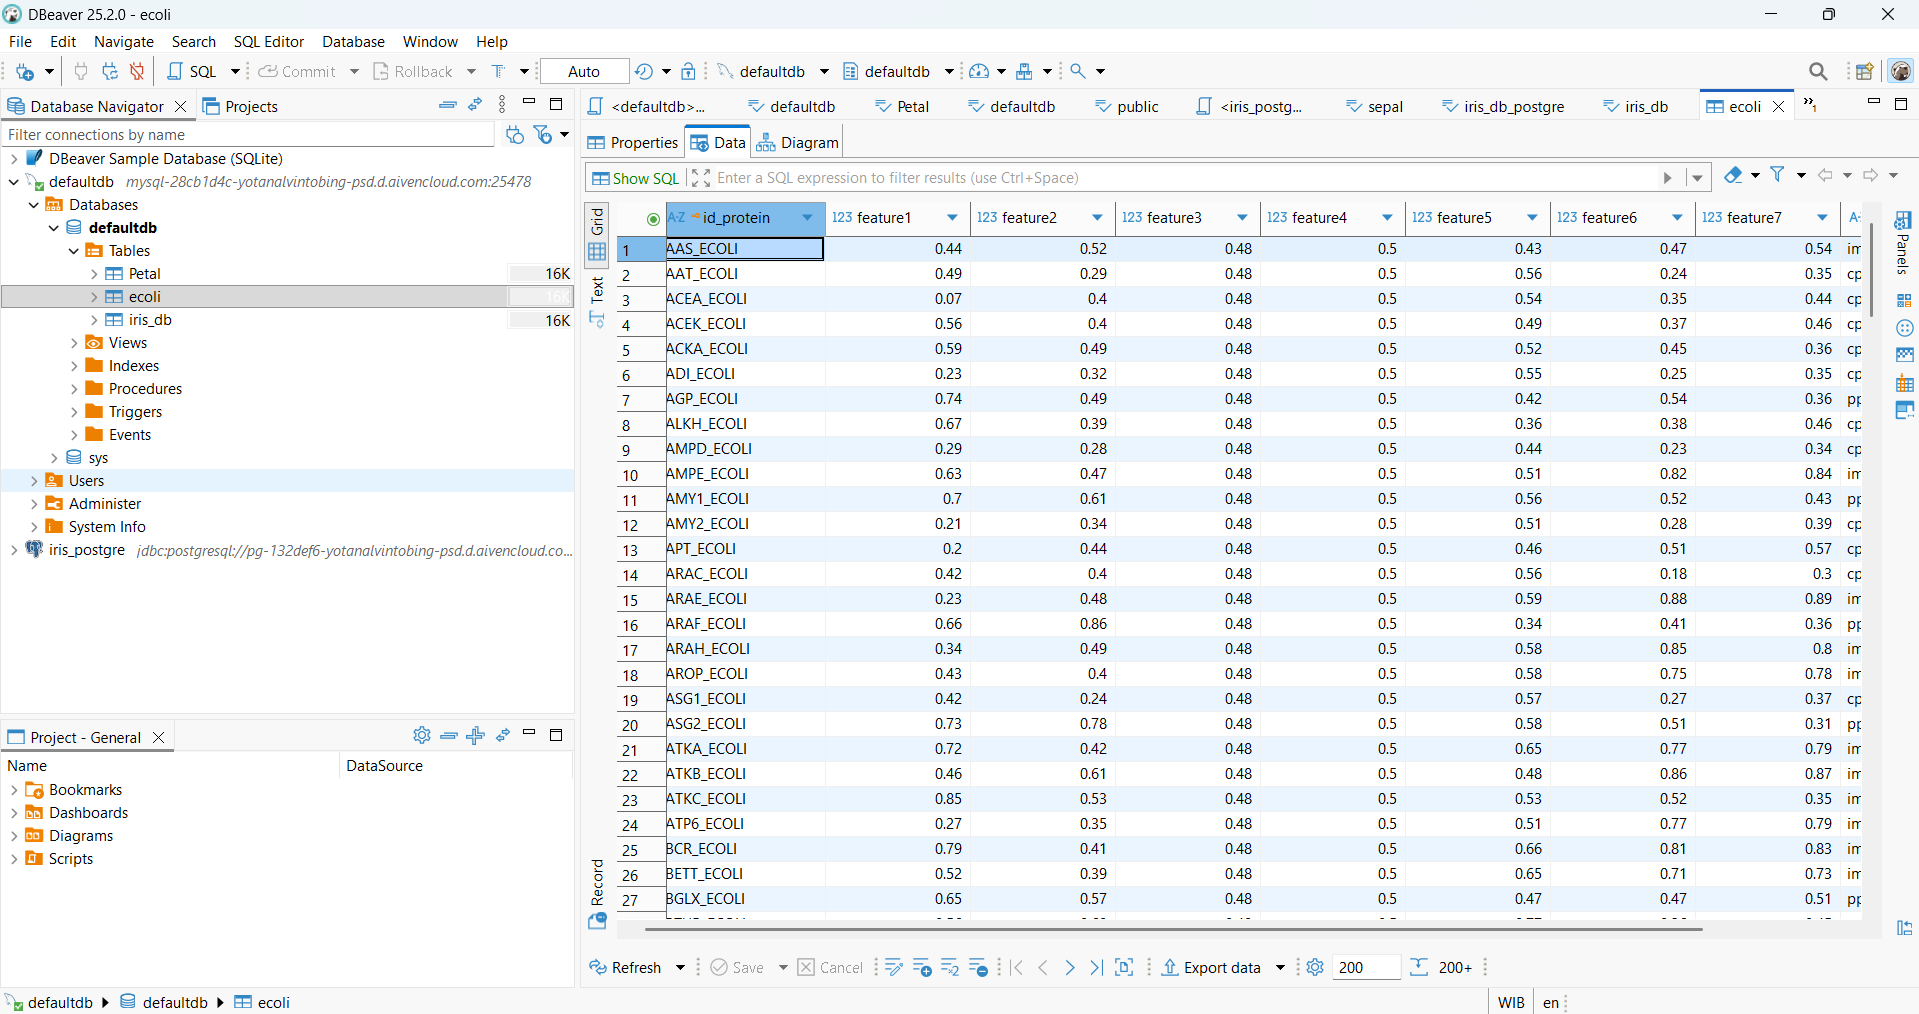

### ampilkan data dalam scatter plot  menggunakan PCA

Sebelum menampilkan kedalam bentuk scatter plot kita harus menginstal library,menyambungkan ke aiven

berikut adalah kodenya:

In [3]:
!pip install pymysql sqlalchemy imbalanced-learn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from collections import Counter

host = "mysql-28cb1d4c-yotanalvintobing-psd.d.aivencloud.com"
port = 25478   # jangan lupa tambahkan port
user = "avnadmin"
password = "AVNS_e3Tzp6XE6YCGJ7fV9ku"
database = "defaultdb"

# Buat koneksi
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

# Ambil dataset ecoli dari tabel
query = "SELECT * FROM ecoli;"
df = pd.read_sql(query, engine)

print("Jumlah baris:", len(df))
print(df.head())

# Pisahkan fitur & label
X = df[[f"feature{i}" for i in range(1, 8)]].values
y = df["class_label"].values


Jumlah baris: 336
   id_protein  feature1  feature2  feature3  feature4  feature5  feature6  \
0   AAS_ECOLI      0.44      0.52      0.48       0.5      0.43      0.47   
1   AAT_ECOLI      0.49      0.29      0.48       0.5      0.56      0.24   
2  ACEA_ECOLI      0.07      0.40      0.48       0.5      0.54      0.35   
3  ACEK_ECOLI      0.56      0.40      0.48       0.5      0.49      0.37   
4  ACKA_ECOLI      0.59      0.49      0.48       0.5      0.52      0.45   

   feature7 class_label  
0      0.54          im  
1      0.35          cp  
2      0.44          cp  
3      0.46          cp  
4      0.36          cp  


Penjelasan Kode:

*   Install library → memastikan pymysql, sqlalchemy, dan imbalanced-learn tersedia.

*   Koneksi ke MySQL Aiven → menggunakan create_engine dengan host, port, user, password, database.
*  Ambil data dari tabel ecoli → query SQL SELECT * FROM ecoli;.
*   Pisahkan fitur & label →
    *   X = kolom feature1 s/d feature7
    *   y = kolom class_label





Setelah itu masuk ketahap menampilkan data kedalam scatter plot menggunakan PCA seperti ini

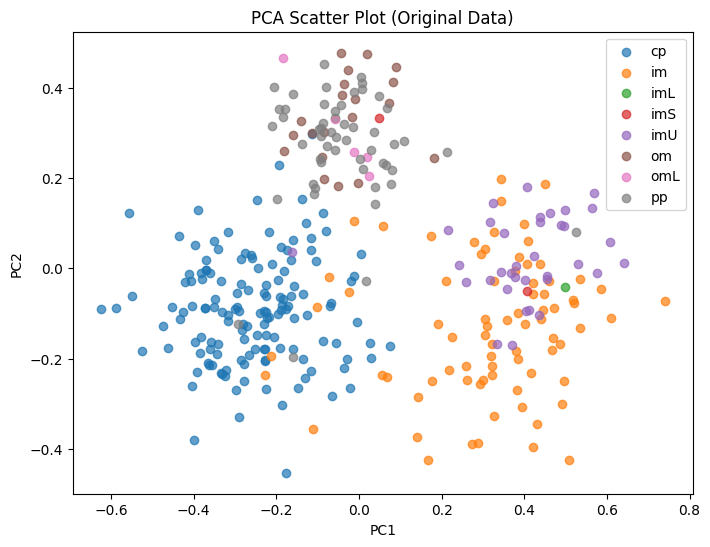

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
for label in np.unique(y):
    idx = (y == label)
    plt.scatter(X_pca[idx,0], X_pca[idx,1], label=label, alpha=0.7)

plt.title("PCA Scatter Plot (Original Data)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(); plt.show()

* PCA dipakai untuk menurunkan dimensi dari 7 fitur → 2 dimensi (PC1 & PC2).

* Visualisasi:

    * Data ditampilkan dalam scatter plot.

    * Setiap kelas (class_label) digambarkan dengan warna berbeda.

    * Memberi gambaran distribusi asli antar kelas.

In [5]:
print("Distribusi kelas sebelum balancing:", Counter(y))

max_class_size = max(Counter(y).values())
X_res, y_res = [], []

for cls in np.unique(y):
    X_cls = X[y == cls]
    n_samples = len(X_cls)
    n_to_add = max_class_size - n_samples

    # simpan data asli
    X_res.append(X_cls)
    y_res.extend([cls] * n_samples)

    # buat data sintetis jika perlu
    if n_to_add > 0:
        idx_choice = np.random.choice(range(n_samples), size=n_to_add, replace=True)
        X_new = X_cls[idx_choice].copy()

        # tambahkan noise kecil → mirip prinsip ADASYN
        noise = np.random.normal(0, 0.01, X_new.shape)
        X_new = X_new + noise

        X_res.append(X_new)
        y_res.extend([cls] * n_to_add)

# gabungkan
X_res = np.vstack(X_res)
y_res = np.array(y_res)

print("Distribusi kelas setelah balancing:", Counter(y_res))


Distribusi kelas sebelum balancing: Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imS': 2, 'imL': 2})
Distribusi kelas setelah balancing: Counter({np.str_('cp'): 143, np.str_('im'): 143, np.str_('imL'): 143, np.str_('imS'): 143, np.str_('imU'): 143, np.str_('om'): 143, np.str_('omL'): 143, np.str_('pp'): 143})


Penjelasan:

* Hitung distribusi kelas awal dengan Counter(y).

* Tentukan target jumlah data per kelas → disamakan dengan kelas mayoritas.

* Untuk setiap kelas:

    * Simpan data aslinya.

    * Hitung kekurangan jumlah sampel dibanding kelas mayoritas.

    * Jika masih kurang → buat data sintetis dengan:

        * Sampling data asli dengan replacement.

        * Tambahkan noise acak kecil agar variatif (mirip prinsip ADASYN).

* Gabungkan hasil → X_res (fitur hasil balancing) dan y_res (label hasil balancing).

* Cetak distribusi kelas setelah balancing → harus lebih seimbang.

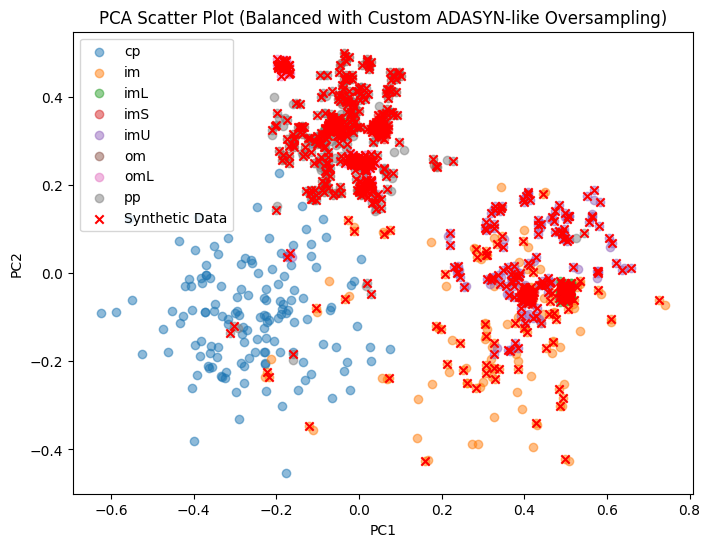

In [6]:
# Tandai data sintetis
X_rounded = np.round(X, 5)
X_res_rounded = np.round(X_res, 5)
synthetic_mask = [tuple(x) not in set(map(tuple, X_rounded)) for x in X_res_rounded]

# PCA transform
X_res_pca = pca.transform(X_res)

plt.figure(figsize=(8,6))
for label in np.unique(y_res):
    idx = (y_res == label)
    plt.scatter(X_res_pca[idx,0], X_res_pca[idx,1], label=label, alpha=0.5)

# Synthetic data → X merah
plt.scatter(X_res_pca[synthetic_mask,0], X_res_pca[synthetic_mask,1],
            c="red", marker="x", label="Synthetic Data")

plt.title("PCA Scatter Plot (Balanced with Custom ADASYN-like Oversampling)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(); plt.show()


Penjelasan:
* Identifikasi data sintetis dengan membandingkan data baru dengan data asli.

* PCA diterapkan lagi pada data hasil balancing (X_res).

* Scatter plot hasil balancing:

* Semua kelas ditampilkan kembali dengan warna berbeda.

* Data sintetis ditandai dengan simbol X merah → agar jelas mana yang asli dan mana yang hasil generate.

* Hasil ini menunjukkan bahwa distribusi data sudah lebih seimbang.